### Lecture 15:

- Learn some basic statisics - samples versus populations and empirical versus theorectical distributions.

- Learn to calculate _central tendencies_, _spreads_. 

- Learn about _significant figures_ and more about formatting output. 

- Learn some useful functions in **NumPy** and **SciPy** for simulating distributions and calculating statistics.

## Basic statistical concepts

Much of this lecture has been cribbed from the open source paper by Olea (2008) available in its entirety here:  https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf which in turn was cribbed from Davis, J. (2002: Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken).  

While this is not a class in statistics, many Earth Scientists write programs to calculate statistics, evaluate significance, and estimate _averages_ and their uncertainties.

So, what is (are?) statistics?  Statistics is the way we analyze, interpret and model data. To do it properly we need to understand a few concepts: 

1) **accuracy** versus **precision**:  accuracy is how close your data are to the "truth" while precision is the reproducibility of your data.  

2) **population** versus **sample**: the _population_ is the set of all possible outcomes of a given measurement (if you had an infinite number of data points), while the _sample_ is what you have - a finite number of data points.  

3) **probability**: Probability is the measure of how likely it is for a particular event to occur.  If something is impossible, it has a probability ($P$) of 0.  If it is a certainty, it has a probability $P$ of 1.  

4) **Theoretical** versus **empirical** distributions: Empirical distributions are measured data. Theoretical distributions are analytical  probabililty functions (mathematical equations) that can be described with an equation.  These can be applied to  data, allowing interpretations about the likelihood of observing a given measurement, whether  sets of data are "different" from theoretical or other empirical data sets and other powerful statistical tests.  

Now we will go through each of these concepts in a bit more detail. 

## Accuracy versus precision

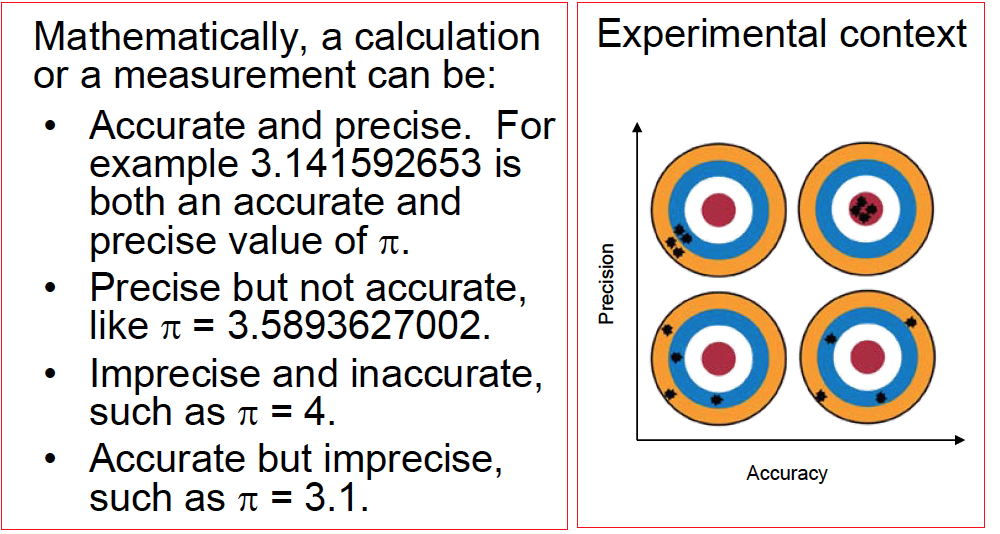

In [2]:
Image(filename='Figures/accuracy_precision.png',width=700)

_Figure from_ [https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf ](https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf)


## Populations versus samples

The population is what you would have if you had all possible outcomes - but you never do. We can describe the distribution of a population by using  equations which will predict, say, the fraction of measurements (the _density_) expected to fall within a given range ($x$ between 0 and 1), assuming a particular theoretical distribution.  This curve is called the _probability density function_.  

There are equations describing many different types of distributions and evaluating the equations gives us a theoretical distribution. In this lecture, we will look at a few common distributions (_binomial, uniform, normal,_ and  _log-normal_).   

Samples are finite collections of observations which may belong to a given distribution. In this lecture, it will be handy to   simulate 'measurements' by drawing 'observations' from a theoretical distribution, instead of making actual measurements.  This is the _Monte Carlo_ approach (after the gambling town).


Examples of theoretical versus empirical distributions:

### Binomial distribution:

#### Theoretical

Perhaps the most straight forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).   For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}, x=0,1,2,...,n.$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts using our old friend from Lecture 11, the **lambda** function. We'll code the equation as a **lambda** function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts).  We can collect all the answers in a list and  plot the probability ($P$) versus the number of heads ($x$) out of $n$ attempts.  

Here is a **lambda** function called **Binomial**, which returns the probability of a given number of heads ($x$) out of $n$ attempts.  Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of winning the lottery given purchase of $n$ tickets).  Oh and we finally have a use for the **np.factorial( )** function we ran accross in Lecture 11.  Or you could our own **reduce** funtion. :)  

In [3]:
Binomial=lambda x,n,p :(np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x)))\
                   *(p**(x))*(1.-p)**(n-x)
    

We can use **Binomial** to look at the predicted likelihood of getting $x$ heads out of $n=12$ attempts (coin tosses) with a $p$ (probability) of 0.5. 


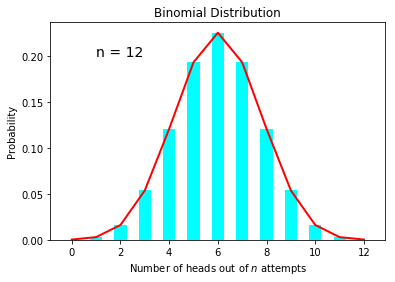

In [4]:
 # calculate the probability  of x heads in n attempts with a probability of 0.5
n,p=12,0.5 # number of attempts in each trial, probability of getting a head
xs=range(n+1) # range of test values from 0,N
Probability=[] # probability of getting x heads out of n attempts
for x in xs: # step trough the test values
    Probability.append(Binomial(x,n,p))# collect the theoretical probability of getting x heads
plt.bar(xs,Probability,width=.5,color='cyan') # plot as bar plot
plt.plot(xs,Probability,'r-',linewidth=2) # plot as solid line
plt.xlabel('Number of heads out of $n$ attempts') # add labels
plt.ylabel('Probability') 
# place a note in upper left in axes coordinates with a fontsize of 14.
plt.text(1,.2, 'n = %i'%(n),  fontsize=14)
plt.title('Binomial Distribution');

_Red line is the theoretical probability distribution function.  Cyan bars are the same, but plotted as a bar graph._

I plotted the outcome as both a bar plot and a solid red line, to demonstrate two different ways of visualizing the results. Note that the red line is the _probability density function_.  

What you learn from this is that the most probable outcome is 6 out of 12 heads (with a $P$ of ~23%),   but other outcomes can very well occur.  


#### Empirical

One great feature about computers is that we can simulate a data sample to compare to our theoretical predictions. 
We can use the module **numpy.random** to generate examples of  simulated data sets in a process called _Monte Carlo simulation_.  We encountered **numpy.random( )** in the Lecture 14 when we used the **random.randint( )** function.  In this lecture we will discover a few more, starting with **random.binomial( )** which generates samples from a _binomial_ distribution. 

To use all the functions in **random** we must first import it.  

In [5]:
from numpy import random
help(random.binomial)

Help on built-in function binomial:

binomial(...) method of mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``n`` and ``p`` are both scalars.
        Otherwise, ``np.broadcas

To generate some  data, you could either patiently do the experiment with a coin toss, or we can just use the **random.binomial** function to simulate 'realistic' data.  

**random.binomial( )** requires 2 parameters, $n$ and $p$, with an optional keyword argument **size** (if **size** is not specified, it returns a single trial).   Each call to **random.binomial( )** returns the number of heads flipped in a single trial of $n$ coin tosses, given the probablity $p=0.5$. 

Let's try it with $n=12$ and $p=0.5$.  This little code block returns the number of heads out of $n$ attempts. You will get a different answer every time you run it.  It also gives the probabilty of getting that result from our lambda function **Binomial( )**. 

In [6]:
n,p=12,0.5 # same as before
x=random.binomial(n,p) # size = 1 by default
print (x, 'heads, with a likelihood of: ',Binomial(x,n,p))

3 heads, with a likelihood of:  0.0537109375


 As the number of times you repeat this 'experiment' approaches infinity, the distribution of outcomes will approach the theoretical distribution (i.e., you will get an average of 9 heads out of 12 attempts 5% of the time).   

So let's compare the results simulated via Monte Carlo for some number of experiments ($Nmc$) with the theoretical distribution.  To do this,  we pretend that each student in the class ($Nmc=20$) flips a coin $n=12$ times and reports the number of heads.  We can collect the number of heads flipped by each student in a list called **Simulated**.

In [7]:
n,p=12,0.5
Nmc=20 # number of simulated experiments each with n  attempts
Simulated=random.binomial(n,p,size=Nmc)
plt.bar(xs,Probability,color='cyan', label='Theoretical') # theoretical curve as bar graph
plt.hist(Simulated,density=True,color='orange',histtype='step',linewidth=3, label='Simulated') # note the normed key word - 
    #  this normalizes the total to be unity
plt.xlabel('Number of heads out of $n$ attempts')
plt.ylabel('Fraction of simulated experiments')
plt.text(1,.3, 'n = %i'%(n),  fontsize=14)
plt.legend();

_Orange line is the Monte Carlo results.  Blue line is the theoretical probability distribution function from before._

Notice that every time you repeat this, the Monte Carlo results are a little different.  And if you change $Nmc$ to be, say 10, you get more and more "weird" results.  But if you set $Nmc$ to 5000 - your results would look consistently  closer to the theoretical predictions. 

It is worth pointing out here that it is possible to make sure that every time you repeat a "random draw" that you get the SAME answer (for reproducibility of your code, for example if you share it with others).  To do this you can use the **random.random(seed)** option where $seed$ is set in your program.  Here is  examples with and without the seed: 


In [8]:
seed=2019
print ('random numbers generated with seed')
for i in range(10):
    random.seed(seed)
    print (random.binomial(n,p,size=Nmc))
print ('random numbers generated without seed')
for i in range(10):
    print (random.binomial(n,p,size=Nmc))


random numbers generated with seed
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
[ 8  6  7  7  8  5  7  8  8  6  6  5  4  8  4 10  3  6  5  8]
random numbers generated without seed
[6 6 5 8 6 4 5 3 6 6 8 9 7 8 9 8 8 7 4 5]
[5 4 6 8 5 5 7 4 6 8 5 5 5 5 5 9 3 7 5 7]
[6 7 5 7 5 5 8 8 6 7 5 5 6 6 8 7 9 5 6 5]
[5 5 5 6 6 7 4 5 6 6 2 7 7 9 6 6 7 6 5 3]
[ 4  7  5  7  7  4  9  8  5  5  4  7  3  5  3 10  4  4  5  6]
[5 9 5 6 5 4 9 7 8 5 3 6 3 3 7 6 7 9 5 5]
[8 7 8 6 7 4 6 6 5 2 4 4 6 8 7 7 5 

For the purposes of this lecture, we want different random numbers every time, so we will work without the seed.  Also, something about the 'density' (formerly 'normed') keyword in **plt.hist( )**.  According to the **NumPy** documention for  **density**: If it is set to 'True', the result is the value of the probability density function at the bin level, normalized such that the integral over the entire range is 1. But note: the sum of the histogram values will not  equal  1 unless bins of unity width are used.

There are many other distributions that we could play with. In the rest of the lecture, we will look at a few of the more common ones in Earth Science:   uniform,  normal and  log normal distributions.   We'll approach each in the same way as for the binomial distributions starting with the theoretical distribution followed by a Monte Carlo simulation of empirical results.  

### Uniform distribution

#### Theoretical

A uniform distribution is pretty much what it sounds like.  All outcomes within the bounds of $a,b$ are equally likely. Outside those bounds, the probability is zero.   For example, when playing dice, what is the likelihood of getting a particular number of dots (1 in 6).

The analytical form for a uniform distribution is:

$$P=f(x,a,b)= \frac{1}{b-a},  x=a \rightarrow b$$

where $a$ and $b$ are bounds ($a \le x<b$). $P$ is the probability of getting a value of $x$.  It is zero if $x$ is not between $a$ and $b$, and  between $a$ and $b$ the probability is a constant. In fact the probability is  $1/n$ where $n$ is  $b-a$, the number of possible outcomes.

Say we have a die with 1 to 6 dots on each face.  The probability of getting one dot is 1 in 6, but getting seven dots is zero.  

We code up the **lambda** function as before:


In [9]:
Uniform=lambda a,b : (1./(b-a)) # function for calculating P from a uniform distribution.  

And calculate the probability density function as before:

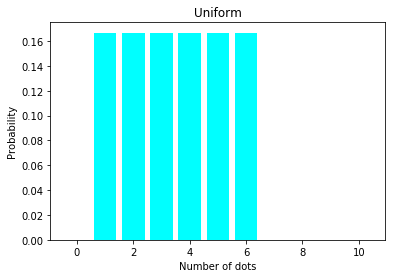

In [12]:
# calculate the probability of returning a value x with a uniform distribution between a,b
xs=range(11) # range of possible number of dots from 1 to 10. 
a,b=1,7 # bounds for the uniform distribution
Probability=[] # container for the theoretical results. 
for x in xs: # step through test values
    if x not in range(a,b): # if x<a or x>b,  there is zero probability of rolling this number
        Probability.append(0) # save the probability
    else: # otherwise
        Probability.append(Uniform(a,b)) # get the probability from our little function
plt.bar(xs,Probability,color='cyan') # plot as a bar plot
plt.title('Uniform')
plt.xlabel('Number of dots')
plt.ylabel('Probability');

#### Empirical

And now we can look at the Monte Carlo simulation of an empirical distribution using **random.uniform( )**. 

So here it is.    

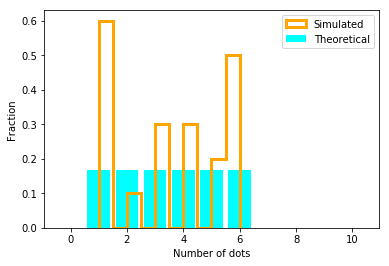

In [14]:
a,b=1,7 # keep the same bounds
Nmc=20 # number of "students" rolling the dice
Simulated=random.uniform(a,b,Nmc).astype('int') # get Nmc test values in one go.  :)
# the .astype(int) makes this an array of integers, as only integers are possible outcomes
plt.bar(xs,Probability, color='cyan',label='Theoretical')
# plot results as histogram normed to sum to unity and use histtype of 'step' to make it see-through
plt.hist(Simulated,density=True,histtype='step',color='orange',linewidth=3.,label='Simulated') 
plt.xlabel('Number of dots')
plt.ylabel('Fraction')
plt.legend();


There are two more closely related distributions which we need to discuss:  the normal and the log-normal distributions.  We'll do these with the same approach as before, looking first at the theoretical probability function and then as a Monte Carlo simulation.  

### Normal distributions

The so-called "normal" distribution (also known as a Gaussian distribution after the guy who thought it up) describes data, for example,  measurement data, that have uncertainties associated with them - they are more or less precise.  There is some 'true' answer but all the measurements have some slop. Imagine measuring the width of a sedimentary bed, or the length of a fossil thigh bone or the distance between two points.  The measurement data will have some _average_ (a.k.a. _central tendency_) and some degree of _spread_.  For normal distributions,  the _average_ is the arithmetic _mean_ $\mu$ and the spread is the _standard deviation_, $\sigma$.  

#### Theoretical: 

The analytical form for a normal distribution is:

$$P=f(x,\mu, \sigma)= \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},-\infty < x < \infty$$


We can put this equation into a lambda function called **Normal** and work on it as before with one small modification.  We can write the Normal _lambda_ function such that it returns an array if $x$ is passed as an array.  This is a trick called 'vectorization' and is numerically more efficient than calling the function many times and appending to a list of results, for example.  Use this trick any time you can!
 

In [15]:
Normal=lambda x,mu,sigma : (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))


And, we calculate the probability of observing a measurement $x$ from a normal distribution with $\mu$ and $\sigma$.

In [16]:
mu,sigma,incr=10,1,.2 # set the mean,  standard deviation and bin width
xs=np.arange(5,15,incr) # make an array of test values
Probability=Normal(xs,mu,sigma) # get probabilities 
plt.bar(xs,Probability,width=incr,color='cyan', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('x')
plt.ylabel('Probability')
plt.text(5,.3,'$\mu$ = '+str(mu)) # stick on some notes
plt.text(5,.27,'$\sigma$ ='+str(sigma))
plt.title('Normal');


That should look a lot like the so-called 'bell curve' - the curve used for grading for example - because that is exactly what it is.  

#### Empirical

So let's compare the bell curve with some simulated data.  For this, we can use  **random.normal( )**.

In [17]:
mu,sigma=10,1 # set the mean,  standard deviation
Nmc=20 # number of monte carlo simultions
Simulated=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr, edgecolor='k',label='Theoretical',color='cyan') # make the bar chart
plt.hist(Simulated,density=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.legend();

We talked about the mean and standard deviation of a theoretical distribution.  Now we  need to learn how to calculate them for our simulated sample (in case you don't know already!).  Note that for the population (as defined above), the average is $\mu$ but for our _sample_, it is $\bar x$:

$$ \bar{x} = \frac{\sum x_i}{N},$$

where $\sum_{i=1}^N$ means the sum of all individual values of $x$ from the first to the last.

Similarly, the standard deviation of the population is $\sigma$, while for our sample, it is $s$:  

$$s = \sqrt {\frac {1}{N}\sum_{i=1}^{N}(x_i-\bar x)^2 }$$

   Note that the _variance_ of the data is $s^2$ (and for the population it is $\sigma^2$).  

With **NumPy**, we can calculate the mean and standard deviation with the methods **.mean( )** and **.std( )** like this:

In [31]:
print ('Mean of the simulated distribution = ',Simulated.mean()) 
print ('standard deviation of simulated distribution =',Simulated.std()) 

Mean of the simulated distribution =  10.086868749412135
standard deviation of simulated distribution = 0.8782405911779055


Now we need to remember about formating and significant figures from a few lectures ago.  For our purposes, only the first few of these trailing decimals are significant, so we should format our print string accordingly.  These are floating point variables and say we want a total of up to, say, 6 characters with two after the decimal point.  We would write this with a string formatting statement with the form '%XXX.XXf'   %(variable).  

In [32]:
print ('Mean of the simulated distribution = %6.2f'%(Simulated.mean() ))
print ('standard deviation of simulated distribution =','%6.2f'%(Simulated.std() ))

Mean of the simulated distribution =  10.09
standard deviation of simulated distribution =   0.88


Let's plot the mean and $s$ on our histogram:  

In [33]:
plt.bar(xs,Probability,width=incr,color='cyan',label='Theoretical') # make the bar chart
#stderr=Simulated.std()/np.sqrt(len(Simulated))
plt.hist(Simulated,density=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.plot([Simulated.mean(),Simulated.mean()],[0,.45],'k-',linewidth=2,label='Mean')
plt.plot([Simulated.mean()-Simulated.std(),Simulated.mean()-Simulated.std()],[0,.45],
         'g--',linewidth=2,label='Standard deviation')
plt.plot([Simulated.mean()+Simulated.std(),Simulated.mean()+Simulated.std()],[0,.45],
         'g--',linewidth=2,label='_nolegend_') # notice how to suppress a legend entry!
plt.ylim(0,.5)
plt.legend(loc=2);

Notice two things: 

1) The standard deviation includes ~67% of the data (not 95% - that would be 1.97$\sigma$, or 2-sigma, informally).  The $\pm \sigma$ bounds are the dashed lines in the above plot.  

2) The mean of our sample is generally not the same as the mean of the distribution ($\bar x \ne \mu$).  In fact, the 95% confidence bounds for the MEAN is related to the 'standard error', which is:

$s_e = \frac {s}{\sqrt N}$.


The 95% confidence bounds for the mean is given by 1.97$s_e$.  This means in practice that the mean will be more than 1.97$s_e$ away from true mean 5% of the time.    We could test that statement with another little Monte Carlo type simulation, but I leave that to student curiosity.   




Now we need to look at one last distribution:  the log-normal distribution.



### Log normal

Many things in nature are not normally distributed.  Many processes lead to distributions in which the log of the quantity is normally distributed instead of the quantity itself.  For example, grain sizes in sedimentary sequences are often log normally distributed.  These distributions are _log-normal_ and behave differently than normal distributions.  

#### Theoretical

 The equation for the log-normal probability density function is this: 

$$P=f(x,\mu, \sigma)= \frac{1}{x\sigma \sqrt{2\pi}} \exp {\bigl(-\frac{(\text{ln}(x)-\mu)^2}{2\sigma^2}}\bigr),0< x < \infty$$

Notice that $x$ is in the denominator so we can't evaluate the probability when $x$=0.  

As before we make a **lambda** function  to evaluate the probability density of log-normal distributions:




In [34]:
# Here is a log normal probability density function maker: 
LogNormal=lambda x,mu,sigma : (1./(x*sigma*np.sqrt(2.*np.pi)))*np.e**(-((np.log(x)-mu)**2)/(2.*sigma**2))


And we evaluate it for a range of possible values of $x$ for given $\mu, \sigma$.

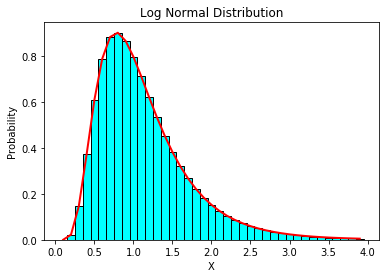

In [35]:
# calculate the probability of returning a value x with a normal distribution with mu and sigma
mu,sigma,incr=0,.5,.1 # set the mean,  standard deviation and bin width
xs=np.arange(incr,4,incr) # make an array of test values
Probability=LogNormal(xs,mu,sigma) # get probabilities for the array of Xs
plt.bar(xs,Probability,width=incr,color='cyan', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.title('Log Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability');

#### Empirical

To  simulate data, we can use **random.lognormal( )**, specifying mean and standard deviation as for the normal distribution. 

Here we plot the theoretical distribution and the  simulated data, along with its mean and the $\pm \sigma$ bounds calculated as we did in the last lecture for normal distributions.

In [36]:
mu,sigma=0,.5 # set the mean,  standard deviation
Nmc=100 # number of monte carlo simultions
Simulated=random.lognormal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
plt.bar(xs,Probability,width=incr,color='cyan',edgecolor='k',label='Theoretical') # make the bar chart
plt.hist(Simulated,density=True,histtype='step',color='orange',linewidth=3.,label='Simulated') # plot them
plt.plot([Simulated.mean(),Simulated.mean()],[0,1],'k-',linewidth=2,label='Mean')
plt.plot([Simulated.mean()-Simulated.std(),Simulated.mean()-Simulated.std()],[0,1],
        'g--',linewidth=2,label='lower bound')
plt.plot([Simulated.mean()+Simulated.std(),Simulated.mean()+Simulated.std()],[0,1],
        'r--',linewidth=2,label='upper bound')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend();

### Hey! 

Why is the mean way off to the right?  And those confidence bounds don't look right at all!  

It turns out that the mean as defined in the last lecture is only good for 'normal' distributions and shouldn't be used for other types. 

First, let's look at the plot using the log normal of the data instead of the data themselves:  




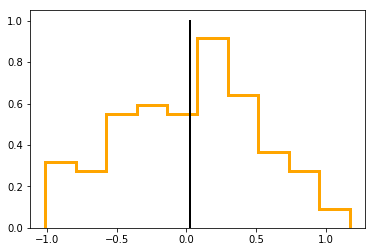

In [37]:
barx=np.log(Simulated).mean() # get the  mean of the logs of the  simulated data set
s=np.log(Simulated).std() # get the standard deviation of same
plt.hist(np.log(Simulated),density=True,histtype='step',color='orange',linewidth=3) # plot them 
plt.plot([barx,barx],\
         [0,1],'k-',linewidth=2);


It appears that a log normal distribution looks more "normal" when plotted on a log scale.  But the mean doesn't behave the way we expect for normal distributions (offset to the long tail). 

So what would be a sensible way of describing the _central tendency_ (Expectation $E$) and spread (_variance_)  for a log normal distribution? 

These are expressed as follows: 

$$E(x) =\exp\bigr( \mu +\frac{1}{2}\sigma^2 \bigl),$$

and 

$$ \text{var}(x) = \bigr[\exp (\sigma^2)-1\bigr]*\exp(2\mu + \sigma^2)$$

where $\mu, \sigma$ are the mean and standard deviation of the logs of the population.  For the sample, we will refer to them at $\bar x$ and $s$ respectively and for the expectation and variance we will use $m$ and $v$.  

Fortunately, there is a nice **SciPy** package that does statistics for log normal distributions.  **SciPy** is a very powerful package of scientific python functions, many of which were later incorporated into **NumPy**, but not all.  One of the "leftovers" is   **scipy.stats.lognorm**.  You can take a look at what **lognorm** can do for us using **help(stats.lognorm)** after we import it, if you are curious.  

In [38]:
from scipy import stats 

Ok - you should be curious!  So let's take a look at the help message: 

In [39]:
help(stats.lognorm)

Help on lognorm_gen in module scipy.stats._continuous_distns object:

class lognorm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A lognormal continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `lognorm` is:
 |  
 |  .. math::
 |  
 |      f(x, s) = \frac{1}{s x \sqrt{2\pi}}
 |                \exp(-\frac{1}{2} (\frac{\log(x)}{s})^2)
 |  
 |  for ``x > 0``, ``s > 0``.
 |  
 |  `lognorm` takes ``s`` as a shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  A common parametrization for a lognormal random variable ``Y`` is in
 |  terms of the mean, ``mu``, and standard deviation, ``sigma``, of the
 |  unique normally distributed random variable ``X`` such that exp(X) = Y.
 |  This parametrization corresponds to setting ``s = sigma`` and ``scale =
 |  exp(mu)``.
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      lognorm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._dis

The function **stats.norm** returns 'moments' of data samples,  the first two of which are the log normal mean ($m$) and the variance $v$.

So, we should do the following: 
- calculate the mean $\bar x$, and standard deviation $s$  of the LOG of the simulated dataset, 
- set the **scale** to be $e^{\bar x}$
- calculate the first few moments, mean ($m$) and variance ($v$).  

Now we can calculate the moments, $m$ and $v$ and compare them to the originals $\bar x$ and $s$ and the $\mu$ and $\sigma$ of the theoretical distribution used to generate the simulated data: 

In [40]:
m,v=stats.lognorm.stats(s,moments='mv',scale=np.exp(barx))
print ('mu  %5.2f'%(mu),' and barx %5.2f'%(barx))
print ('sigma %5.2f'%(sigma),' and s %5.2f'%(s))
print ('E %5.2f'%(np.exp(mu + 0.5*sigma**2)),' and m %5.2f'%(m))
print ('var %5.3f'%((np.e**(sigma**2)-1)*np.e**(2*mu+sigma**2)),' \
       and v  %5.3f'%(v))

mu   0.00  and barx  0.02
sigma  0.50  and s  0.50
E  1.13  and m  1.16
var 0.365         and v  0.379


There is also a **NumPy** function to calculate the median (**np.median( )**) and  for the mode we can use **scipy.stats.mode( )**.  But be careful with this  because it finds the most frequent value, which may have a bunch of significant figures and so each value occurs only once.  To get a reasonable estimate of the  mode, we first have to round off the numbers in **Simulated**.  We can use **np.round()** for that.  

Here's how to calculate each of these types of expected values:  





In [41]:
mean=Simulated.mean() # you knew this already
mean_other_way =np.mean(Simulated) # this is a different way, but works the same.  
median=np.median(Simulated) # this is the way to do the median with NumPy
mode,count=stats.mode(np.round(Simulated,1)) # round to 2 significant digits, return mode and number in that mode
print ('mean: ',mean)
print ('mean other way: ',mean_other_way)
print ('median: ',median)
print ('mode: ',mode,' count: ',count)

mean:  1.156629982755693
mean other way:  1.156629982755693
median:  1.0814143428971879
mode:  [1.2]  count:  [10]


Notice that **mode** and **count** are both lists.   

So let's plot up the data and put  the  mean, median and the mode on it.

In [42]:
newmode=mode[0] # make this a single number, not a list with one element
plt.hist(Simulated,density=True,bins=20,histtype='step',color='orange',linewidth=3) # plot them 
plt.plot(xs,Probability,'c-',linewidth=2,label='Probability'); # plot the theoretical probability distribution function
plt.plot([mean,mean],[0,.75],'k-',linewidth=2,label='Mean') # put on green line, label for legend. 
plt.plot([median,median],[0,1],'g-',linewidth=2,label='Median') # black line
plt.plot([newmode,newmode],[0,1],'m-',linewidth=2,label='Mode') # magenta line
plt.legend()   
plt.ylim(0,1.1)
plt.xlabel('x'); # set the y axis limits.  
plt.ylabel('Fraction');

# Assignment #5
### 1. 

- Read the data file "Datasets/NAVDAT/NAVDAT.csv" into a pandas DataFrame
- Find all the igneous units with ages less than 23 Ma (Neogene).
- San Diego is located at: (33,-117)
- Calculate the great circle distance from San Diego to every Neogene igneous unit (Hint: use the module you made for  Lecture 9  to do this). 
- Calculate the distance to the nearest Neogene igneous unit. 
- Print out the distance in km with one significant figure. Hint: Use **map( )** and **reduce( )**.

### 2. 

- Simulate a dataset with a log normal distribution, a mean of 1, a standard deviation of .1 and a size (N) of 100 
- Plot the data using a linear X-scale
- Calculate the mean, median, mode, skewness, and kurtosis for the distribution 
- Plot the mean, median, and mode as vertical lines
- Plot the skewness and kurtosis as notes on the plot
- Include a legend
